### Chapter two - Reed-Frost dynamics

#### Contents:
* [Assumptions and setup](#setup)
* [Probability of escape and infection](#escape)
* [Initial Conditions](#init)
* [Evolution](#evolution)
* [Reed Frost Dynamical System](#reedfrost)
* [Simulation](#simulation)
* [Dynamics assumed at start of outbreak](#start)
* [Mathematics aside](#math)
* [The Basic Reproduction number and link to outbreaks](#reponumber) 
* [Relationship between Reproduction number and outbreak](#outbreak)
* [The Effective Reproduction number and Herd Immunity](#herd)
* [The growth rate and estimating the basic reproduction number at the onset of an outbreak](#estim1) 
* [The ability to study epidemic chains and household transmission](#chains)
* [Fitting the Reed-Frost to observations](#fit2data)
* [Using the computer to optimize (Optional, for now)](#computer)

#### Assumptions and setup <a class="anchor" id="setup"></a>

Suppose that there exists $N$ individuals who can exist in one of three disease states starting at time $0$ and ending at time $T$:
1. Susceptible - An individual is not infected at present but can be infected in the future.
2. Infected - An individual is infected at present and can infect other susceptible individuals. 
3. Removed - An individual is no longer susceptible, nor infected, and cannot again become infected. 

- Assume, for each time unit, that all $N$ individuals come into contact with one another, and that each interaction is independent. 
When a susceptible comes into contact with an infected, the susceptible individual has a probability $p$ of moving from the susceptible state to the infected state ($S \to I$). 

- Assume that if an individual is infected then they (1) are only infected for a single time unit and (2) after that time units ends they are removed. 

- Assume that the probability of infection should depend on the number of infected individuals in the population.

#### Probability of escape and infection <a class="anchor" id="escape"></a>

Consider a single susceptible individual. 
At time $t$, this susceptible individual will contact all $I$ infected individuals. 
At each contact between the susceptible individual and one of the infected individuals, there is a probabilty $p$ that the infected individual is successfull and infects this suscpetible individual.

If $p$ is the probability that an infected individual---often called can infector---can infect this suceptible then the probability that an infector does **not** infect this suscpetible is $1-p$.
Then the probability that this susceptible is not infected by the first member in $I$ is $(1-p)$ and the probability that this this susceptible is not infected by the first **and** second infector is 

$$
(1-p) \times (1-p)
$$

and so the probability that this suscpetible is not infected by all infectors in $I$ is 

$$
p(\text{escape}) = (1-p) \times (1-p)\times (1-p) \cdots \times (1-p) = (1-p)^{I}
$$
This is typically called the **esape probability**. 

If $(1-p)^{I}$ is the probability that no infector successfully infects this susceptible then the probability that at least one individual infects this suscpetible is 

$$
 p(\text{infection}) = 1 - \left[(1-p)^{I}\right]
$$






#### Initial conditions <a class="anchor" id="init"></a>

The above assumptions and conditions assume that the $N$ individuals who can exist in one of three disease states may move from one disease state to another *over time*.
Let us be explicit, and define the number of individuals in each disease state at time $0$, and define how the number of indivduals in each of the three disease states is expected to change over time. 

The **initial conditions** assigns a number of individuals to each disease state at time $0$, and is denoted 
\begin{align}
i_{0} &= i^{0}\\ 
s_{0} &= s^{0}\\
r_{0} &= r^{0}
\end{align}
where lowercase letters denote an observed or realized number of individuals in each disease state at time $0$ (the subscript) and lowercase letters with a superscript denote values between $0$ and $N$. 
For this model, the sum of the number of individuals in each disease state must equal $N$. 

#### Evolution<a class="anchor" id="evolution"></a>

Now that we have specified, at time $0$, the number of individuals who belong to the susceptible disease state ($s_{0}$), number of individuals who belong to the infected disease state ($i_{0}$), and number of individuals who belong to the removed disease state ($r_{0}$), we must decide the number of individuals at **the next time step**.

At time $t$, suppose that there exists $S_{t}$ susceptible individuals. 
A susceptible individual moves to the infected state with probability $1 - (1-p)^{I_{t}}$ (see above section on escape). 
Further, we assume that for each susceptible the probability of moving to the infected state is independent. 
If we define "success" as $1 - (1-p)^{I_{t}}$ and the number of trials as $S_{t}$ then the **number of infected individuals at time $t+1$ or $I_{t+1}$** has a Binomial distribution, 

\begin{align}
I_{t+1} &\sim \text{Bin}\left(S_{t}, \left[1 - (1-p)^{I_{t}}\right] \right).
\end{align}

Let the observed number of infected individuals at time $t+1$ equal $i_{t+1}$.
Then the number of susceptibles at the next time step is then equal to the number of susceptibles at time $t$ minus the number of susceptibles who became infected. 

\begin{align}
s_{t+1} &= s_{t} - i_{t+1} \\ 
\end{align}

Finally, we assume that at the end of each time unit all infected individuals at time $t$ move to the "removed" category. So then, 
\begin{align}
r_{t+1} &= r_{t}+ i_{t}
\end{align}





#### The Reed Frost Dynamical System<a class="anchor" id="reedfrost"></a>

The system of equations 
\begin{align}
I_{t+1} &\sim \text{Bin}\left(S_{t}, \left[1 - (1-p)^{I_{t}}\right] \right)\\
s_{t+1} &= s_{t} - i_{t+1} \\ 
r_{t+1} &= r_{t}+ i_{t}
\end{align}

along with initial conditions 
\begin{align}
(s^{0}, i^{0},r^{0})
\end{align}

define a system called **The Reed Frost Dynamical System**. 
We note that the captial $I_{t+1}$ indicates that the number of infectors at time $t+1$ is a random variable. 
After the number of infectors is determined, the number of susceptibles is automatically determined. 
However, before the number of infectors is selected the number of susceptibles is itself a random variable. 

One should be careful about when the number of susceptibles at time $t+1$ is a random variable.
Before the number of infectors is assigned the number of susceptibles  is a random variable. After the number of infectors is assigned then the number of susceptibles is not random. 

#### Simulation<a class="anchor" id="simulation"></a>

Below is a simulation of the above Reed Frost Dynamical System.
Presented is the number of infected individual at each time unit for a specified number of simulations. 
At this point, the code (in Python) is not important.

Instead, please select different values for $p$, the probability of infection; $i^{0} the initial number of infectors; and sims, the number of unique times to run this Reed Frost System. 

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def Reed_Frost_Dynamical_system(sims=10, T=15, N=1000, i0=1, p=0.02,show=True):
    def evolve(T,N,i0,p):
        import numpy as np 
        import matplotlib.pyplot as plt

        infectors    = [i0]
        removed      = [0]
        susceptibles = [N-i0]
        for t in range(T):
            i_tp1 = np.random.binomial(n=susceptibles[-1], p=1-(1-p)**( infectors[-1] ) , size=1  ) [0]
            s_tp1 = susceptibles[-1] - i_tp1
            r_tp1 = removed[-1] + infectors[-1]

            infectors.append(i_tp1)
            susceptibles.append(s_tp1)
            removed.append(r_tp1)
        infectors = np.array(infectors)

        return infectors

    fig,ax = plt.subplots()
    for _ in range(sims):
        infectors = evolve(T,N,i0,p)
        ax.plot(infectors)
    ax.set_ylim(0,75)
    ax.set_xlabel("Time units (t)",fontsize=10)
    ax.set_ylabel("Number of infectors (It)",fontsize=10)
    if show:
        plt.show()
    return ax
        

interact(Reed_Frost_Dynamical_system
         ,T=fixed(15)
         ,N=fixed(100)
         ,r0=fixed(0)
         ,sims=widgets.IntSlider(min=10, max=100, step=10, value=50) 
         ,i0=widgets.IntSlider(min=0, max=20, step=1, value=1) 
         ,p=(0,0.1,0.00125)
        ,show=True)

ModuleNotFoundError: No module named 'ipywidgets'

#### Dynamics assumed at start of outbreak <a class="anchor" id="start"></a>

At the start of an outbreak, there is a small number of infectors, a large number of susceptible individuals, and (typically) no indiviuals in the removed disease state.
One way to represent this state of nature is to assign the following initial conditions
$( s^{0} = N-1, i^{0}=1,r^{0}=0)$.

Given a probability of infection, $p$, and the above initial conditions, we can explore how the number of infectors changes in the Reed-Frost Dynamical system and how all three disease states behave early during an outbreak (when $T$ is small). 


We know that in the Reed-Frost model, 

$I_{t+1} \sim \text{Bin}(S_{t}, 1-(1-p)^{I_{t}} )$

**Our goal** is to understand the behavior of $I$ when $t$ is small and when $i^0$ is small. 


First, let $t=0$. Then 

$I_{1} \sim \text{Bin}(S_{0}, 1-(1-p)^{i^{0}} )$

In this first time step, the number of initial susceptibles $s^{0}$ is very close to $N$ and so 

$I_{t+1} \sim \text{Bin}(N, 1-(1-p)^{i^{0}} )$

--- 
#### Math aside (we need this)<a class="anchor" id="aside"></a>

We want to simplify $(1-p)^{i^{0}}$ to better understand what this expression means. 
This expression looks a bit like $x^{a}$. 
Now the tricks. 

#### Trick 1
The exponential function and logarithm are inverses of one another. 
That is, we are allowed to take the logarithm of an expression (say $x$) followed by the exponential and we will not change the orginal value of our expression. 

$$
x = e^{\log(x)}
$$

This means that 

\begin{align}
x^{a} &= e^{\log(x^{a})}\\
      &= e^{a\log(x)}
\end{align}

Finally, an important approximation for the exponential is it's *series* expansion. 

\begin{align}
    e^{x} \approx 1 + x + \frac{x^{2}}{2} + \frac{x^{3}}{6} + \cdots = \sum_{k=1}^{\infty} \frac{x^{k}}{k!}
\end{align}

where $k!$ is read "k factorial" and equals $k! = k\cdot(k-1)\cdot(k-2)\cdots 1$

#### Trick 2

The logarithm of $1-x$ is, when $x$ is small, approximately equal to $-x$ or 

\begin{align}
       \log(1-x) &= -x + x^{2}/2 \cdots \\
                 &\approx -x 
\end{align}

---
### We're Back. 

Lets use the two tricks above to approximate $1-(1-p)^{i^{0}}$ when $p$ is small. 

\begin{align}
1-(1-p)^{i^{0}} &= 1- e^{ \log \left( (1-p)^{i^{0}}\right)} \\ 
                &= 1- e^{ i^{0} \log \left( 1-p\right)} \\
                &= 1- e^{ -i^{0}p} \\
                &= 1- (1-i^{0}p ) \\ 
                &= i^{0}p
\end{align}

This means then, when $p$ is small that

$I_{1} \sim \text{Bin}(N, 1-(1-p)^{i^{0}} )$

is close to 

$I_{1} \sim \text{Bin}(N, i^{0}p)$ and so the expected value is equal to 

\begin{align}
    \mathbb{E}(I_{1}) = N i^{0}p
\end{align}


We can use the same procedure above to find that 

\begin{align}
\mathbb{E}\left(I_{2}\right) &= N i^{1} p \\
                             &= N \left( N i^{0} p \right) p \\ 
                             &= \left(Np\right)^{2} i^{0}
\end{align}

and in general 

\begin{align}
\mathbb{E}\left(I_{t+1}\right)  &= \left(Np\right)^{t} i^{0}
\end{align}

We can check the accuracy of our approximation above---that $\mathbb{E}\left(I_{t+1}\right) = \left(Np\right)^{t} i^{0}$---numerically.
Below, we plot the number of infectors over time units for 100 separate simulations. 
We choose a small $p = 0.0015$ and $N=1000$ individuals in the system. 
We also plotted in solid black our approximation. 

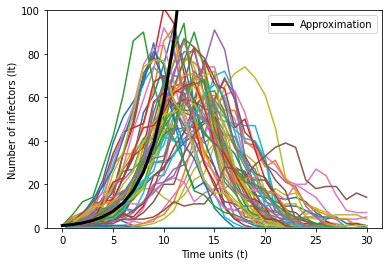

In [11]:
import numpy as np
N=1000
p=0.0015

times = np.arange(0,30)

ax=Reed_Frost_Dynamical_system(sims=100, T=30, N=1000, i0=1, p=0.0015,show=False)
ax.plot( times, (N*p)**(times) ,lw=3, color="black", label ="Approximation")
ax.set_ylim(0,100)

plt.legend()
plt.show()

We see that our approximation works well for a small number of time units. 
After $t=10$ our approximaton suggests that the number of infectors will continue to increase. 
However, after time unit 10 the number of infectors begins to decrease towards zero. 
Note that not all epidemic trajectories fit this approximation.

#### The Basic Reproduction Number<a class="anchor" id="reponumber"></a>

Let us observe 100 simulated epidemic trajectories for the above system (plus parameters) for varying values of $p$. 
Take a minute to change the parameter value $p$. 
What do you observe? 

In [12]:
interact(Reed_Frost_Dynamical_system
         ,T=fixed(30)
         ,N=fixed(1000)
         ,sims = fixed(100)
         ,r0=fixed(0)
         ,i0=fixed(1) 
         ,p=widgets.FloatSlider(value=0.001, min=0, max=3/1000, step=0.5/1000,readout_format='.4f',)
        ,show=True)

interactive(children=(FloatSlider(value=0.001, description='p', max=0.003, readout_format='.4f', step=0.0005),…

<function __main__.Reed_Frost_Dynamical_system(sims=10, T=15, N=1000, i0=1, p=0.02, show=True)>

After enough trials, you may see that when the value of $p \ge 1/1000$ that the number of infectors grows to a peak and then declines. For values smaller than $1/1000$ the infectors never really increase. Instead they decline.

The **basic reproduction number** is defined as the average number of individuals who move to the infected state as a result of a single infected individual in a population of all susceptibles. 

For the Reed-Frost Dynamical System, an approximate reproduction number is 
$\mathcal{R}_{0} = \mathbb{E}(I_{1}) = Np$

##### Relationship between Reproduction number and outbreak. <a class="anchor" id="outbreak"></a>

When infections start to take place, public health officials and epidemiologists typically assign this spread of an infectious agent to one of three classifications: an outbreak, an epidemic, a pandemic.  
An **outbreak** is defined as a higher-than-expected number of infections present in a local or small region of space on a short time scale. 
Like an outbreak, an **epidemic** is defined as a higher-than-expected number of infections present in an expansize area or among a large community on a short time scale.
A **pandemic** is an outbreak that occurs on a global scale. 

Lets look closer at
$\mathbb{E}\left(I_{t+1}\right) = \mathcal{R}_{0}^{t} i^{0}$
If as assume that the number of initial infectors is one, we have 

$\mathbb{E}\left(I_{t+1}\right) = \mathcal{R}_{0}^{t}$

where $\mathcal{R}_{0} = Np$ is a constant.

If $\mathcal{R}_{0} = 1 $ then 
\begin{align}
\mathbb{E}\left(I_{t+1}\right) &= \mathcal{R}_{0}^{t}\\
                               &= 1^{t}\\
                               &= 1
\end{align}

and the number of infectos is a constant, never growing one.

If $\mathcal{R}_{0} < 1 $ then (lets say $\mathcal{R}=1/2$) 
\begin{align}
\mathbb{E}\left(I_{t+1}\right) &= \mathcal{R}_{0}^{t}\\
                               &= (1/2)^{t}
                               \to 0 \text{  as  } t \to \infty
\end{align}

Finally, If $\mathcal{R}_{0} > 1 $ then (lets say $\mathcal{R}=2$) 
\begin{align}
\mathbb{E}\left(I_{t+1}\right) &= \mathcal{R}_{0}^{t}\\
                               &= (2)^{t}
                               \to \infty \text{  as  } t \to \infty
\end{align}

Intuitively, in order for an infectious agent to continue to spread it must multiply faster than it is removed from the population. 



#### The Effective Reproduction number and Herd Immunity<a class="anchor" id="herd"></a>

The basic reproduction number, $\mathcal{R}_{0}$, may not always be a realistic way to characterize whether an infecitous agent will begin to spread within a population. 
This is because the number (or proportion) of susceptibles in the population may not be close to $N$. 
For example, if an infectious agent has a $\mathcal{R}_{0}=3$ then in a fully susceptible population we would expect an infector to infect three susceptibles.
However, if the population was immune~(for example vaccinated) to the infectious agent then there are 0 susceptibles. 
In the case where there are no suscpetibles, the this infecitous agent with $\mathcal{R}_{0}=3$ would not propogate at all.

To characterize the importance of the proportion of susceptibles on thespread of an infectious agent in the population, we define the **effective reproduction number**. 
The **Effective reproduction number** is the expected number of susceptibles individuals who will get infected at the next time unit. 
Note, we left out of the above definition the added constraint that the population must be fully susceptible. 

For the Reed-frost model, the effective repoduction number at time unit $t$ is $\mathcal{R}_{eff} = S_{t}p$.
Where $S_{t}$ is the number of susceptible individuals.

Below, lets consider the expected number of infections for $S_{0}$ number of susceptibles. In other words, we do not necesarrily choose to have an entirely suscpetible population ($S_{0} \approx $ N). 

\begin{align}
   \mathbb{E}(I_{t})    &= \mathcal{R}_{0} = Np > 1      \\
    S_{0} p &> 1      \\
    S_{0} &>\frac{1}{p} \\
    s_{0} &>\frac{1}{Np} \hspace{2em}\text{(Divide both sides by N)} \\
    s_{0} &>\frac{1}{\mathcal{R}_{0}} \\ 
    1-\text{immune} &>\frac{1}{\mathcal{R}_{0}}\\ 
    \text{immune} &< 1 - \frac{1}{\mathcal{R}_{0}}   
\end{align}

where $s_{0}$ is the proportion of susceptibles and $\text{immune}$ is the proportion of people who are immune. 

The quantity $q$ is called the **Herd Immunity Threshold** if, for such a value $q$, an outbreak occurs if the proportion of susceptible individuals exceeds $q$ and an outbreak does not occur otherwise. 
For the Reed-Frost Dynamical system, the Herd Immunity Threshold is $1 - \frac{1}{\mathcal{R}_{0}}$. 

Lets take a look at the effective repoduction number and herd immunity threshold below.

In [13]:
def Reed_Frost_Dynamical_system(sims=10, T=15, N=1000, i0=1, R0 = 1, s0=999 ,show=True):
    
    p  = R0/1000
    
    Reff = s0*p
    HIT = 1 - 1./R0
    props = s0/N
    
    def evolve(T,N,s0,i0,p):
        import numpy as np 
        import matplotlib.pyplot as plt

        infectors    = [i0]
        susceptibles = [s0]
        removed      = [N-(s0+i0)]
        for t in range(T):
            i_tp1 = np.random.binomial(n=susceptibles[-1], p=1-(1-p)**( infectors[-1] ) , size=1  ) [0]
            s_tp1 = susceptibles[-1] - i_tp1
            r_tp1 = removed[-1] + infectors[-1]

            infectors.append(i_tp1)
            susceptibles.append(s_tp1)
            removed.append(r_tp1)
        infectors = np.array(infectors)

        return infectors

    fig,ax = plt.subplots()
    for _ in range(sims):
        infectors = evolve(T,N,s0,i0,p)
        ax.plot(infectors)
    ax.set_ylim(0,75)
    ax.set_xlabel("Time units (t)",fontsize=10)
    ax.set_ylabel("Number of infectors (It)",fontsize=10)
    ax.text(0.05,0.95,s=r"Eff. $\mathcal{R}_{0}$" +" = {:.2f}".format(Reff),ha="left",va="top",transform=ax.transAxes)
    
    ax.text(0.05,0.85,s=r"HIT" +" = {:.3f}".format(HIT),ha="left",va="top",transform=ax.transAxes)
    ax.text(0.05,0.75,s=r"s0" +" = {:.3f}".format(props),ha="left",va="top",transform=ax.transAxes)
    
    ax.text(0.05,0.65,s=r"Prop Immune" +" = {:.3f}".format(1-props),ha="left",va="top",transform=ax.transAxes)
    
    
    if show:
        plt.show()
    return ax

interact(Reed_Frost_Dynamical_system
         ,T =fixed(30)
         ,N =fixed(1000)
         ,R0=widgets.FloatSlider(value=1, min=0.5, max=3, step=0.125,readout_format='.2f',)
         ,sims = fixed(100) 
         ,i0   = fixed(1) 
         ,s0   = widgets.IntSlider(min=10, max=1000, step=50, value=1000) 
        ,show=True)

interactive(children=(FloatSlider(value=1.0, description='R0', max=3.0, min=0.5, step=0.125), IntSlider(value=…

<function __main__.Reed_Frost_Dynamical_system(sims=10, T=15, N=1000, i0=1, R0=1, s0=999, show=True)>

#### The growth rate and estimating the basic reproduction number at the onset of an outbreak  <a class="anchor" id="estim1"></a>

During the onset of an outbreak, then the majority of individuals are susceptible to infection, we can take advantage of the fact that the expected number of infected individuals equals 

\begin{align}
    \mathbb{E}\left(I_{t+1}\right) &= \mathcal{R}_{0}^{t}
\end{align}

to estimate the basic reproduction number. 

We can rearrange the above equation as 
\begin{align}
    \log\left[\mathbb{E}\left(I_{t+1}\right)\right] &= t\log\left[\mathcal{R}_{0}\right]. 
\end{align}

If we plot on the vertical axis the log of the reported number of incident cases per time unit and on the horizontal axis we plot time, then we can estimate a line which was slope equal to $\log\left[\mathcal{R}_{0}\right]$, or 

\begin{align}
    \log\left[\mathbb{E}\left(I_{t+1}\right)\right] &= t\log\left[\mathcal{R}_{0}\right]\\ 
                                                  y &= t \cdot \text{slope}
\end{align}

Below, we simulate data from the Reed-Frost model and fit this line. 
We output a point estimate of the basic reproduction number. 

In [14]:
def Reed_Frost_Dynamical_system(sims=10, T=15, N=1000, i0=1, R0=1.25,show=True):
    
    p = R0/N
    
    def evolve(T,N,i0,p):
        import numpy as np 
        import matplotlib.pyplot as plt

        infectors    = [i0]
        removed      = [0]
        susceptibles = [N-i0]
        for t in range(T):
            i_tp1 = np.random.binomial(n=susceptibles[-1], p=1-(1-p)**( infectors[-1] ) , size=1  ) [0]
            s_tp1 = susceptibles[-1] - i_tp1
            r_tp1 = removed[-1] + infectors[-1]

            infectors.append(i_tp1)
            susceptibles.append(s_tp1)
            removed.append(r_tp1)
        infectors = np.array(infectors)

        return infectors
    
    sum_inf = 0
    while sum_inf<10:
        infectors = evolve(T,N,i0,p)
        sum_inf = np.sum(infectors)
        
        t_where = np.argmax(infectors)
        
        Ct = np.log(infectors[:t_where]+0.1)
        
   
    fig,axs = plt.subplots(1,2)
   
    ax=axs[0]
    ax.plot(infectors, 'ko')
    ax.set_xlabel("Time units (t)",fontsize=10)
    ax.set_ylabel("Number of infectors (It)",fontsize=10)
    
    ax = axs[1]
    
    ax.plot( Ct, 'ko')
    ax.set_xlabel("Time units (t)",fontsize=10)
    ax.set_ylabel("Number of infectors (It)",fontsize=10)

    import statsmodels.formula.api as smf
    import pandas as pd
    
    times = np.arange(t_where)
    df = pd.DataFrame({"t":times,"cases":Ct[:t_where]})
    mod = smf.ols(formula='cases~t-1', data=df)
    res = mod.fit()
    
    slope = float(res.params)
    plt.plot(times, slope*times  )
    
    ax.text(0.05,0.95,s=r"$\hat{\mathcal{R}_{0}}$="+"{:.1f}".format(np.exp(slope))
            ,ha="left"
            ,va="top"
            ,transform=ax.transAxes
           ,fontsize=10)
    
    print("Data")
    print(infectors)
    if show:
        plt.show()
    return ax

interact(Reed_Frost_Dynamical_system,
         sims=fixed(1), T=fixed(30), N=fixed(1000), i0=1, R0=widgets.FloatSlider(value=1.5, min=0.5, max=3, step=0.5,readout_format='.2f',),show=True)

interactive(children=(IntSlider(value=1, description='i0', max=3, min=-1), FloatSlider(value=1.5, description=…

<function __main__.Reed_Frost_Dynamical_system(sims=10, T=15, N=1000, i0=1, R0=1.25, show=True)>

#### The ability to study epidemic chains <a class="anchor" id="chains"></a>

Define an **epidemic chain** as the number of infected individuals over discrete time units. 
We will denote an epidemic chain as $i^{1}-i^{2}-i^{3}-i^{4}-i^{5}-\cdots$
where $i^{1}$ specifies the number of infected individuals within the first time unit, $i^{2}$ specifies the number of infected within the second time units and so on. 

*For example*, if we consider a household of 4 individuals then a feasible chain is 
1-2-1 and can be read "one individual was infected. This indiviudal infected two household members, and one of these two household members (not the original infected individual) infected the last household member who was still susceptible.". There are many possible epidemic chains for a household of four individuals. More examples include: 3- or "Three individuals were infected in one time unit and none after"; 1-1-2 or "One individual infected another and this second individal infected the remaining two individuals". 

To compute the probability of an epidemic chain, we defer to the Reed-Frost model. 
\begin{align}
    P( 1-2-1 ) &= P(I_{1} = 2 | S_{0}=4, I_{0}=1) \times P(I_{2} = 1 | S_{1}=2, I_{1}=2)\\
               &= \text{Bin}\left( 2 ; S=4, \theta= \left[1 - (1-p)^{1}\right] \right) \times \text{Bin}\left( 1 ; S=2, \theta= \left[1 - (1-p)^{2}\right] \right)      
\end{align}

If the probabiltiy of infection equals $p=0.1$ then we can compute the above two binomial probabilities (For example, a free calculator is here = [https://homepage.divms.uiowa.edu/~mbognar/applets/bin.html](https://homepage.divms.uiowa.edu/~mbognar/applets/bin.html), and find that 

\begin{align}
 P( 1-2-1 ) = 0.0486 \times 0.3078 = 0.0149
\end{align}

-1